<a href="https://colab.research.google.com/github/santiagovazquezff/solubility-ml/blob/main/solubility_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solubility predictor project**

## **Load data**

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


### **Data separation**

In [3]:
y = df["logS"]
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [4]:
x = df.drop("logS", axis = 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### **Data splitting**

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)


In [6]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
643,3.61260,296.410,0.0,0.272727
722,6.48760,226.448,13.0,0.000000
570,3.15380,284.746,1.0,0.600000
66,0.77880,74.123,2.0,0.000000
1002,1.82140,102.177,3.0,0.000000
...,...,...,...,...
1044,2.82960,253.305,1.0,0.631579
1095,2.10750,218.322,3.0,0.000000
1130,4.14820,335.282,7.0,0.260870
860,4.25720,275.179,4.0,0.352941


In [7]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
218,1.55740,102.177,3.0,0.000000
809,5.20590,345.653,4.0,0.571429
501,4.18090,339.218,4.0,0.545455
649,2.05760,286.349,4.0,0.315789
323,0.72822,146.153,0.0,0.909091
...,...,...,...,...
361,-0.50840,59.068,0.0,0.000000
292,1.94750,116.204,3.0,0.000000
1119,2.16090,257.437,3.0,0.000000
557,3.36680,138.254,0.0,0.000000


## **Model building**

### **Linear regression**

**Training the model**

In [8]:
from sklearn.linear_model import LinearRegression as linear

lr = linear()
lr.fit(x_train, y_train)

LinearRegression()

**Applying the model to make a prediction**

In [9]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [10]:
y_lr_train_pred

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

**Evaluating model performance**

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [12]:
print("LR MSE (Train):" , lr_train_mse)
print("LR R2 (Train):" , lr_train_r2)
print("LR MSE (Test):" , lr_test_mse)
print("LR R2 (Test):" , lr_test_r2)

LR MSE (Train): 1.0139894491573003
LR R2 (Train): 0.7695127746587307
LR MSE (Test): 0.9990844407075306
LR R2 (Test): 0.7705650058569232


### **Random forest**

**Training the model**

In [13]:
from sklearn.ensemble import RandomForestRegressor as randomf

rf = randomf(max_depth = 2, random_state = 42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

**Applying the model to make a prediction**

In [14]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [15]:
y_rf_train_pred

array([-4.39718433, -7.01733129, -4.18145058, -1.17942941, -2.17597404,
       -1.3275458 , -1.22055445, -2.66448365, -2.64170256, -2.21860159,
       -4.18145058, -7.01733129, -3.99425761, -1.3275458 , -2.59744911,
       -1.17942941, -2.68265997, -4.39718433, -1.68301361, -5.35572688,
       -1.42731628, -4.39718433, -5.35572688, -1.48260587, -4.37853402,
       -4.02848446, -2.68265997, -2.42318404, -2.42318404, -4.37853402,
       -1.39804237, -2.68265997, -2.20457108, -7.01733129, -1.54615877,
       -4.37853402, -2.64170256, -2.63703494, -1.54615877, -4.02848446,
       -2.66448365, -4.39718433, -1.39804237, -4.39718433, -3.56333831,
       -2.63703494, -4.39718433, -4.39718433, -1.37059365, -2.68265997,
       -5.35572688, -3.46298206, -2.63703494, -2.68265997, -1.39804237,
       -2.63703494, -7.01733129, -2.66448365, -1.39804237, -4.02848446,
       -4.37853402, -1.17942941, -2.66448365, -1.37059365, -4.18145058,
       -1.51871005, -1.39804237, -7.01733129, -6.99230664, -3.68

**Evaluating model performance**

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [17]:
print("RF MSE (Train):" , rf_train_mse)
print("RF R2 (Train):" , rf_train_r2)
print("RF MSE (Test):", rf_test_mse)
print("RF R2 (Test):", rf_test_r2)

RF MSE (Train): 1.0502511099749254
RF R2 (Train): 0.7612702336785788
RF MSE (Test): 1.0469953205257059
RF R2 (Test): 0.7595624999799544


## **Model results**

In [18]:
table = [
  {"Model:": "Linear regression", "MSE (Train):": lr_train_mse, "R2 (Train):": lr_train_r2, "MSE (Test):": lr_test_mse, "R2 (Test):": lr_test_r2},
  {"Model:": "Random forest", "MSE (Train):": rf_train_mse, "R2 (Train):": rf_train_r2, "MSE (Test):": rf_test_mse, "R2 (Test):": rf_test_r2}
]
df = pd.DataFrame(table)
df

,Model:,MSE (Train):,R2 (Train):,MSE (Test):,R2 (Test):
0,Linear regression,1.013989,0.769513,0.999084,0.770565
1,Random forest,1.050251,0.761270,1.046995,0.759562


[]

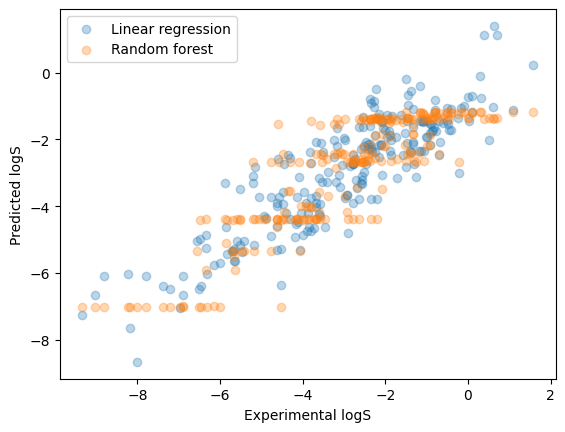

In [21]:
import matplotlib.pyplot as plot
plot.scatter(x = y_test, y = y_lr_test_pred, alpha = 0.3, label = "Linear regression")
plot.scatter(x = y_test, y = y_rf_test_pred, alpha = 0.3, label = "Random forest")
plot.xlabel("Experimental logS")
plot.ylabel("Predicted logS")
plot.legend(["Linear regression", "Random forest"])
plot.plot()
